In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [32]:
data = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


> **Imputing missing values**

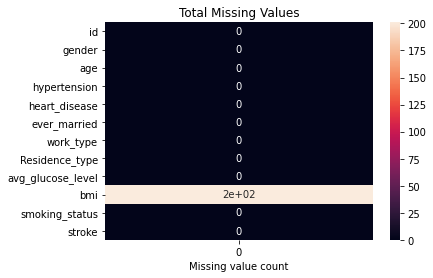

In [33]:
plt.title('Total Missing Values')
ax = sns.heatmap(data.isna().sum().to_frame(),annot=True)
ax.set_xlabel('Missing value count')
plt.show()

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
bmi_pipe = Pipeline( steps=[ ('scale',StandardScaler()),('lr',DecisionTreeRegressor(random_state=42))])
x = data[['age','gender','bmi']].copy()
x.gender = x.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
msng = x[x.bmi.isna()]
x = x[~x.bmi.isna()]
y = x.pop('bmi')
bmi_pipe.fit(x,y)
bmi_predicted= pd.Series(bmi_pipe.predict(msng[['age','gender']]),index=msng.index)
data.loc[msng.index,'bmi']=bmi_predicted 
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.879487,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


> **EDA**

In [35]:
fig = px.pie(data,names='stroke')
fig.update_layout(title='Composition of sample')
fig.show()

In [36]:
f1 = px.bar(data, x='gender', y='stroke') 
f1.update_layout(title='Gender-wise Count of Stroke positive cases')
f1.show()

In [37]:
fig = px.bar(data, x='hypertension', y='stroke') 
fig.update_layout(title='History of Hypertension in Stroke positive cases')
fig.show()

In [38]:
fig = px.bar(data, x='heart_disease', y='stroke') 
fig.update_layout(title='History of Heart disease in Stroke positive cases')
fig.show()

In [39]:
fig = px.bar(data, x='smoking_status', y='stroke') 
fig.update_layout(title='Smoking status of Stroke positive cases')
fig.show()

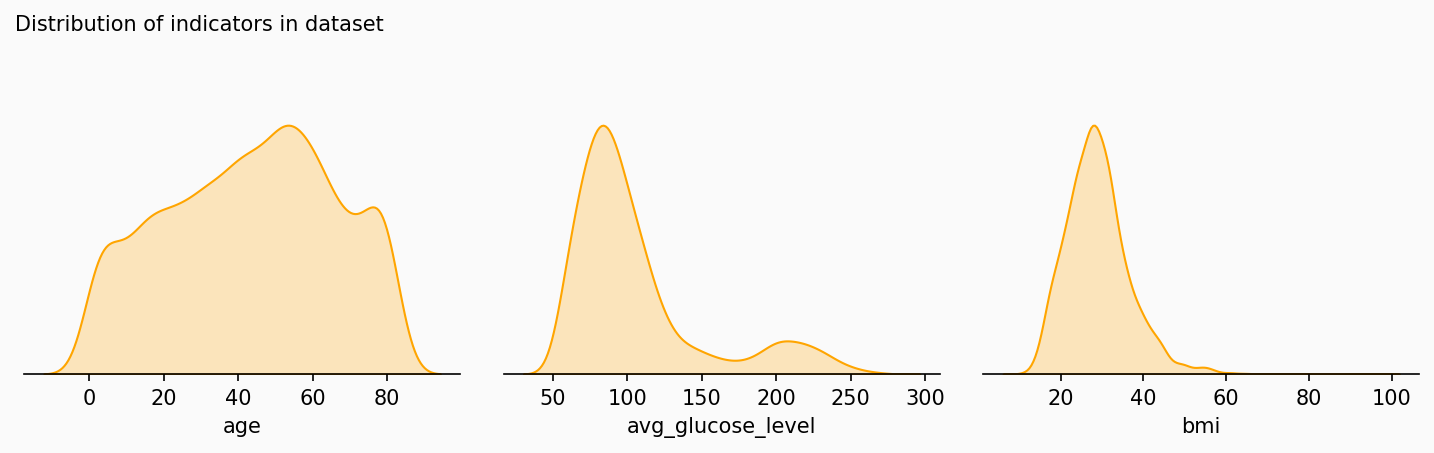

In [40]:
c= ['age','avg_glucose_level','bmi']
fig = plt.figure(figsize=(12, 12), dpi=150, facecolor='#fafafa')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)
background_color = "#fafafa"
plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0
for x in c:
        sns.kdeplot(data[x] ,ax=locals()["ax"+str(plot)], color='orange',shade=True)
        plot += 1
ax0.text(-20, 0.022, 'Distribution of indicators in dataset')        
plt.show()
        

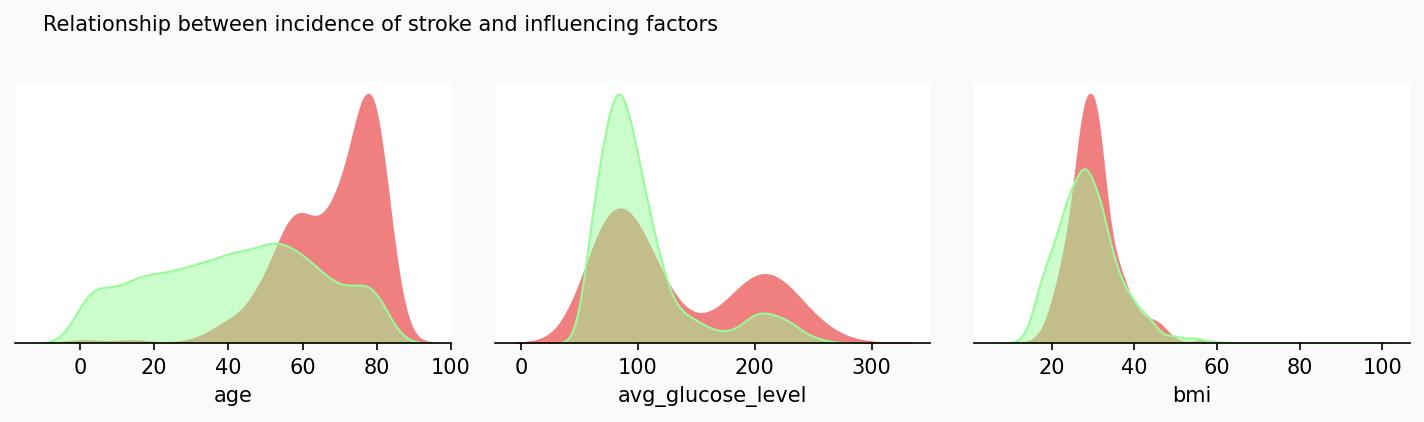

In [41]:
fig = plt.figure(figsize=(12, 12), dpi=150, facecolor='#fafafa') 
ax=[None for i in range(3)]
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)
background_color = "#fafafa"
ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])
ax[2]=fig.add_subplot(gs[0,2])

sns.kdeplot(data=data[data.stroke==1],x='age',ax=ax[0],shade=True,color='lightcoral',alpha=1)
sns.kdeplot(data=data[data.stroke==0],x='age',ax=ax[0],shade=True,color='palegreen',alpha=0.5)
sns.kdeplot(data=data[data.stroke==1],x='avg_glucose_level',ax=ax[1],shade=True,color='lightcoral',alpha=1)
sns.kdeplot(data=data[data.stroke==0],x='avg_glucose_level',ax=ax[1],shade=True,color='palegreen',alpha=0.5)
sns.kdeplot(data=data[data.stroke==1],x='bmi',ax=ax[2],shade=True,color='lightcoral',alpha=1)
sns.kdeplot(data=data[data.stroke==0],x='bmi',ax=ax[2],shade=True,color='palegreen',alpha=0.5)

for i in range(3):
    ax[i].set_yticklabels('')
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False) 

ax[0].text(-10, 0.05, 'Relationship between incidence of stroke and influencing factors') 
plt.show()

In [42]:
f1 = px.bar(data, x='ever_married', y='stroke') 
f1.update_layout(title='Marital status of Stroke positive cases')
f1.show()
f2 = px.bar(data, x='work_type', y='stroke') 
f2.update_layout(title='Work status of Stroke positive cases')
f2.show()
f3 = px.bar(data, x='Residence_type', y='stroke') 
f3.update_layout(title='Residence type of Stroke positive cases')
f3.show()


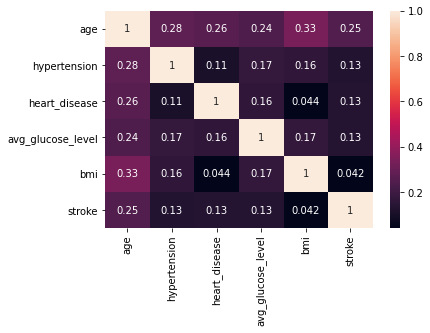

In [43]:
sns.heatmap(data[['age','hypertension', 'heart_disease', 'avg_glucose_level', 'bmi','smoking_status','stroke'] ].corr(), annot = True)
plt.show()

In [44]:
data['gender'] = data['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
data['Residence_type'] = data['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
data['work_type'] = data['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)

> **Upsampling with SMOTE**

In [45]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
eval_data = data[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi','stroke']].sample(int(data.shape[0]*0.2),random_state=42)
train_data = data.drop(index=eval_data.index)
X_eval,y_eval = eval_data[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']], eval_data['stroke']
X,y = train_data[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']], train_data['stroke']
X, y = oversample.fit_resample(X,y)
usampled_data = X.assign(Stroke = y)
X_eval,y_eval = oversample.fit_resample(X_eval,y_eval)
usampled_eval= X_eval.assign(Stroke = y_eval)

> **Model Selection**

In [46]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score

In [47]:
dt_pipe = Pipeline(steps = [('scale',StandardScaler()),('DT',DecisionTreeClassifier(random_state=42))])
rf_pipe = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(random_state=42))])
svm_pipe = Pipeline(steps = [('scale',StandardScaler()),('SV',SVC(random_state=42))])
lr_pipe = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])

X = usampled_data.iloc[:,:-1]
Y = usampled_data.iloc[:,-1]

X_eval = usampled_eval.iloc[:,:-1]
Y_eval = usampled_eval.iloc[:,-1]

x_holdout = X.sample(100)
y_holdout = Y.loc[X.index] 

X = X.drop(index=x_holdout.index)
Y = Y.drop(index=x_holdout.index) 

In [48]:
dt_cross_val = cross_val_score(dt_pipe,X,Y,cv=10,scoring='f1').mean()
rf_cross_val = cross_val_score(rf_pipe,X,Y,cv=10,scoring='f1').mean()
svm_cross_val = cross_val_score(svm_pipe,X,Y,cv=10,scoring='f1').mean()
lr_cross_val = cross_val_score(lr_pipe,X,Y,cv=10,scoring='f1').mean()

fig = px.bar(x=['Decision Tree','Random Forest','SVM','Logistic Regression'],y=[dt_cross_val, rf_cross_val, svm_cross_val,lr_cross_val]) 
fig.update_layout(title='Mean F1 Scores',xaxis_title='Model',yaxis_title='Mean F1 Score')
fig.show()

> **Model Evaluation on Original Data**

In [49]:
dt_pipe.fit(X,Y)
rf_pipe.fit(X,Y)
svm_pipe.fit(X,Y)
lr_pipe.fit(X,Y)

X = data.loc[:,X.columns]
Y = data.loc[:,'stroke']

dt_pred   = dt_pipe.predict(X_eval)
rf_pred   =rf_pipe.predict(X_eval)
svm_pred  = svm_pipe.predict(X_eval)
lr_pred   = lr_pipe.predict(X_eval)

dt_cm  = confusion_matrix(Y_eval,dt_pred )
rf_cm  = confusion_matrix(Y_eval,rf_pred )
svm_cm = confusion_matrix(Y_eval,svm_pred)
lr_cm  = confusion_matrix(Y_eval,lr_pred )

dt_f1  = f1_score(Y_eval,dt_pred)
rf_f1  = f1_score(Y_eval,rf_pred)
svm_f1 = f1_score(Y_eval,svm_pred)
lr_f1  = f1_score(Y_eval,lr_pred)

dt_acc = accuracy_score(Y_eval,dt_pred)
rf_acc  = accuracy_score(Y_eval,rf_pred)
svm_acc = accuracy_score(Y_eval,svm_pred)
lr_acc  = accuracy_score(Y_eval,lr_pred)

dt_rec = recall_score(Y_eval,dt_pred)
rf_rec  = recall_score(Y_eval,rf_pred)
svm_rec = recall_score(Y_eval,svm_pred)
lr_rec  = recall_score(Y_eval,lr_pred)

dt_roc = roc_auc_score(Y_eval,dt_pred)
rf_roc  = roc_auc_score(Y_eval,rf_pred)
svm_roc = roc_auc_score(Y_eval,svm_pred)
lr_roc  = roc_auc_score(Y_eval,lr_pred)

dt_prc = precision_score(Y_eval,dt_pred)
rf_prc  = precision_score(Y_eval,rf_pred)
svm_prc = precision_score(Y_eval,svm_pred)
lr_prc  = precision_score(Y_eval,lr_pred)

In [53]:
fig = px.bar(x=['Decision Tree','Random Forest','SVM','Logistic Regression'],y=[dt_f1, rf_f1, svm_f1,lr_f1]) 
fig.update_layout(title='Mean F1 Scores on Original Data',xaxis_title='Model',yaxis_title='Mean F1 Score')
fig.show()

In [50]:
import plotly.figure_factory as ff

f1 = ff.create_annotated_heatmap(dt_cm , x=['Actual Non-Stroke','Actual Stroke'], y=['Predicted Non-Stroke','Predicted Stroke'],colorscale='Magma',xgap=4,ygap=4)
f1['data'][0]['showscale'] = True
f1.update_layout(title='Decision Tree Performance')
f1.show()

f2 = ff.create_annotated_heatmap(rf_cm , x=['Actual Non-Stroke','Actual Stroke'], y=['Predicted Non-Stroke','Predicted Stroke'],colorscale='Magma',xgap=4,ygap=4)
f2['data'][0]['showscale'] = True
f2.update_layout(title='Random Forest Performance')
f2.show()

f3 = ff.create_annotated_heatmap(svm_cm , x=['Actual Non-Stroke','Actual Stroke'], y=['Predicted Non-Stroke','Predicted Stroke'],colorscale='Magma',xgap=4,ygap=4)
f3['data'][0]['showscale'] = True
f3.update_layout(title='Support Vector Machine Performance')
f3.show()

f4 = ff.create_annotated_heatmap(lr_cm , x=['Actual Non-Stroke','Actual Stroke'], y=['Predicted Non-Stroke','Predicted Stroke'],colorscale='Magma',xgap=4,ygap=4)
f4['data'][0]['showscale'] = True
f4.update_layout(title='Logistic Regression Performance')
f4.show()

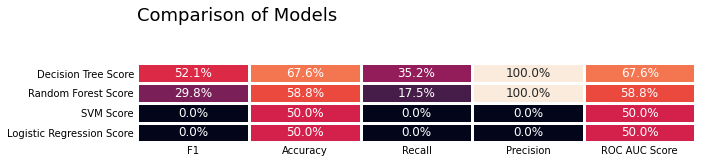

In [55]:
dt_df = pd.DataFrame(data=[dt_f1,dt_acc,dt_rec,dt_prc,dt_roc],columns=['Decision Tree Score'],index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
rf_df = pd.DataFrame(data=[rf_f1,rf_acc,rf_rec,rf_prc,rf_roc],columns=['Random Forest Score'],index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
svm_df = pd.DataFrame(data=[svm_f1,svm_acc,svm_rec,svm_prc,svm_roc],columns=['SVM Score'],index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
lr_df = pd.DataFrame(data=[lr_f1,lr_acc,lr_rec,lr_prc,lr_roc],columns=['Logistic Regression Score'],index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

model_comp = round(pd.concat([dt_df,rf_df,svm_df,lr_df], axis=1),4)
fig = plt.figure(figsize=(10,8)) 
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(model_comp.T,annot=True,fmt=".1%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
ax0.text(0,-2.15,'Comparison of Models',fontsize=18)
ax0.tick_params(axis=u'both', which=u'both',length=0)
plt.show()

In [65]:
import plotly.graph_objects as go

f1 = go.Figure()
f1.add_trace(go.Bar(x=X.columns,y=dt_pipe['DT'].feature_importances_))
f1.update_layout(title='The Importance of the Original Attributes on Decision Tree Prediction',xaxis_title='Attribute',yaxis_title='Importance')
f1.show()

f2 = go.Figure()
f2.add_trace(go.Bar(x=X.columns,y=rf_pipe['RF'].feature_importances_))
f2.update_layout(title='The Importance of the Original Attributes on Random Forest Prediction',xaxis_title='Attribute',yaxis_title='Importance')
f2.show()
